dimension = number of features

# K - means clustering

In [16]:
import pandas as pd
import numpy as np
samples =pd.DataFrame({
    'year': [1950, 1970, 1990, 2010, 2050, 2100],
    'pop': [2.519, 3.692, 5.263, 6.9720,  8.94, 10.85],
    'areaa': [1009, 455, 789, 170, 344, 767]
})
samples

,year,pop,areaa
0,1950,2.519,1009
1,1970,3.692,455
2,1990,5.263,789
3,2010,6.972,170
4,2050,8.940,344
5,2100,10.850,767


In [17]:
new_samples =pd.DataFrame({
    'year': [1950, 1950, 1940, 2010, 2090, 2100],
    'pop': [9.519, 3.692, 5.863, 6.9720,  10.94, 4.85],
    'areaa': [342, 677, 399, 200, 1898, 767]
})

In [18]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
model.fit(samples)
labels = model.predict(samples)

# labels = fit_predict(samples)

labels

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 0, 1, 1, 0])

In [19]:
new_labels = model.predict(new_samples)
new_labels

array([1, 0, 1, 1, 2, 0])

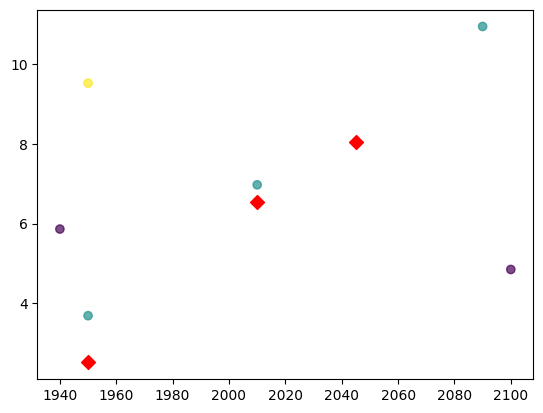

In [27]:
import matplotlib.pyplot as plt
year=[1950, 1950, 1940, 2010, 2090, 2100]
pop = [9.519, 3.692, 5.863, 6.9720,  10.94, 4.85]
plt.scatter(year,pop, c = labels, alpha = 0.7) # print with cluster as labers

centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(centroids_x, centroids_y, c = 'red', marker = 'D', s=50) # s =size, marker = Dimond
plt.show()

# Evaluating a clustering

In [33]:
species = ['two', 'two','zero', 'one', 'zero', 'zero']
labels_species = pd.DataFrame({'labels': labels, 'species' : species})
labels_species

,labels,species
0,2,two
1,1,two
2,0,zero
3,1,one
4,1,zero
5,0,zero


In [34]:
ct = pd.crosstab(labels_species['labels'],labels_species['species']) 
ct

species,one,two,zero
labels,,,
0,0,0,2
1,1,1,1
2,0,1,0


In [35]:
# inertia (bezwładność), how far away the values are from centroids
model.inertia_
# the number of clusters has impact on it
# elbow on inertia plot

50795.66492716667

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will

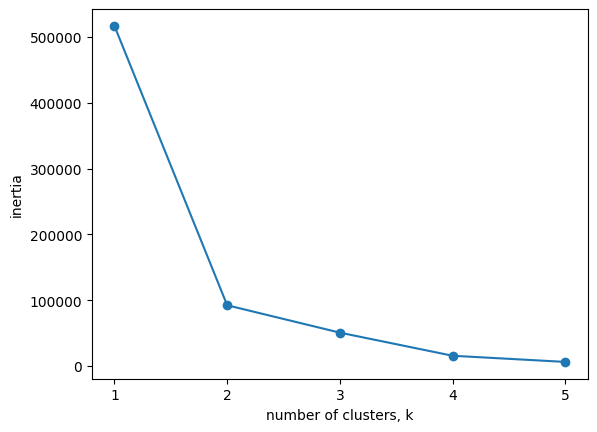

In [36]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# Feature variance
Should be the same for each feature in Kmeans

In [37]:
wine = pd.read_csv('wine.csv')

In [38]:
wine.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [40]:
wine_df = wine.iloc[:,2:15]
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [42]:
w_model = KMeans(n_clusters = 3)
w_model.fit(wine_df)
w_labels = w_model.predict(wine_df)

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [43]:
ct = pd.crosstab(w_labels,wine['class_name']) 
ct

class_name,Barbera,Barolo,Grignolino
row_0,,,
0,19,0,50
1,0,46,1
2,29,13,20


### StandardScaler
- mean = 0, variance = 1
- changes each column 
- It arranges the data in a standard normal distribution. 
- It is more useful in classification than regression

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(wine_df)
StandardScaler(copy = True, with_mean = True, with_std = True)
samples_scaled = scaler.transform(wine_df)

In [45]:
# pipeline
from sklearn.pipeline import make_pipeline

model = KMeans(n_clusters = 3)
scaler = StandardScaler()

pipeline = make_pipeline(scaler,model)
pipeline.fit(wine_df)
w_pipe_labels = pipeline.predict(wine_df)

ct = pd.crosstab(w_pipe_labels,wine['class_name']) 
ct

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


class_name,Barbera,Barolo,Grignolino
row_0,,,
0,0,59,3
1,0,0,65
2,48,0,3


### Normalizer
- It squeezes the data between 0 and 1. 
- changes each row 
- Is more useful in regression than classification

In [46]:
from sklearn.preprocessing import Normalizer 

normalizer = Normalizer()
kmeans = KMeans(n_clusters = 3)

pipeline = make_pipeline(normalizer,kmeans)
pipeline.fit(wine_df)
w_pipen_labels = pipeline.predict(wine_df)

ct = pd.crosstab(w_pipen_labels,wine['class_name']) 
ct

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


class_name,Barbera,Barolo,Grignolino
row_0,,,
0,40,8,33
1,4,0,33
2,4,51,5
